TO DO: 

    - random order of data

    - check if any columns exhibit a one-to-one mapping with the output label; if found, remove them.
    
    - increase test size

    - change the model parameters (max depth, ...?)

    - implement a diffrent more complex model(random forest?, something with more layers)

Fetch phishing website classification dataset

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
#X = phiusiil_phishing_url_website.data.features
X = phiusiil_phishing_url_website.data.features.copy()
y = phiusiil_phishing_url_website.data.targets

# metadata 
print(phiusiil_phishing_url_website.metadata)   
# variable information 
print(phiusiil_phishing_url_website.feature) 

{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Mon Mar 18 

encode categorical columns

In [2]:
categorical_columns = []

for index, row in phiusiil_phishing_url_website.variables.iterrows():
    if row['type'] == 'Categorical':
        categorical_columns.append(row['name'])

label_encoder = LabelEncoder()
#encode every categorical column, but not FILENAME (first one)
for x in categorical_columns[1:]:
    X.isetitem(X.columns.get_loc(x), label_encoder.fit_transform(X[x]))
    #X.loc[:, x] = label_encoder.fit_transform(X.loc[:, x])
    #label_encoder.fit_transform(X[X.loc[:, x]])

Split data, and train model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()
# Train Decision Tree Classifer
DTC = DTC.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DTC.predict(X_test)
#Model accuracy
print("accuracy: ",metrics.accuracy_score(y_test, y_pred))

accuracy:  1.0


visualization od DTC

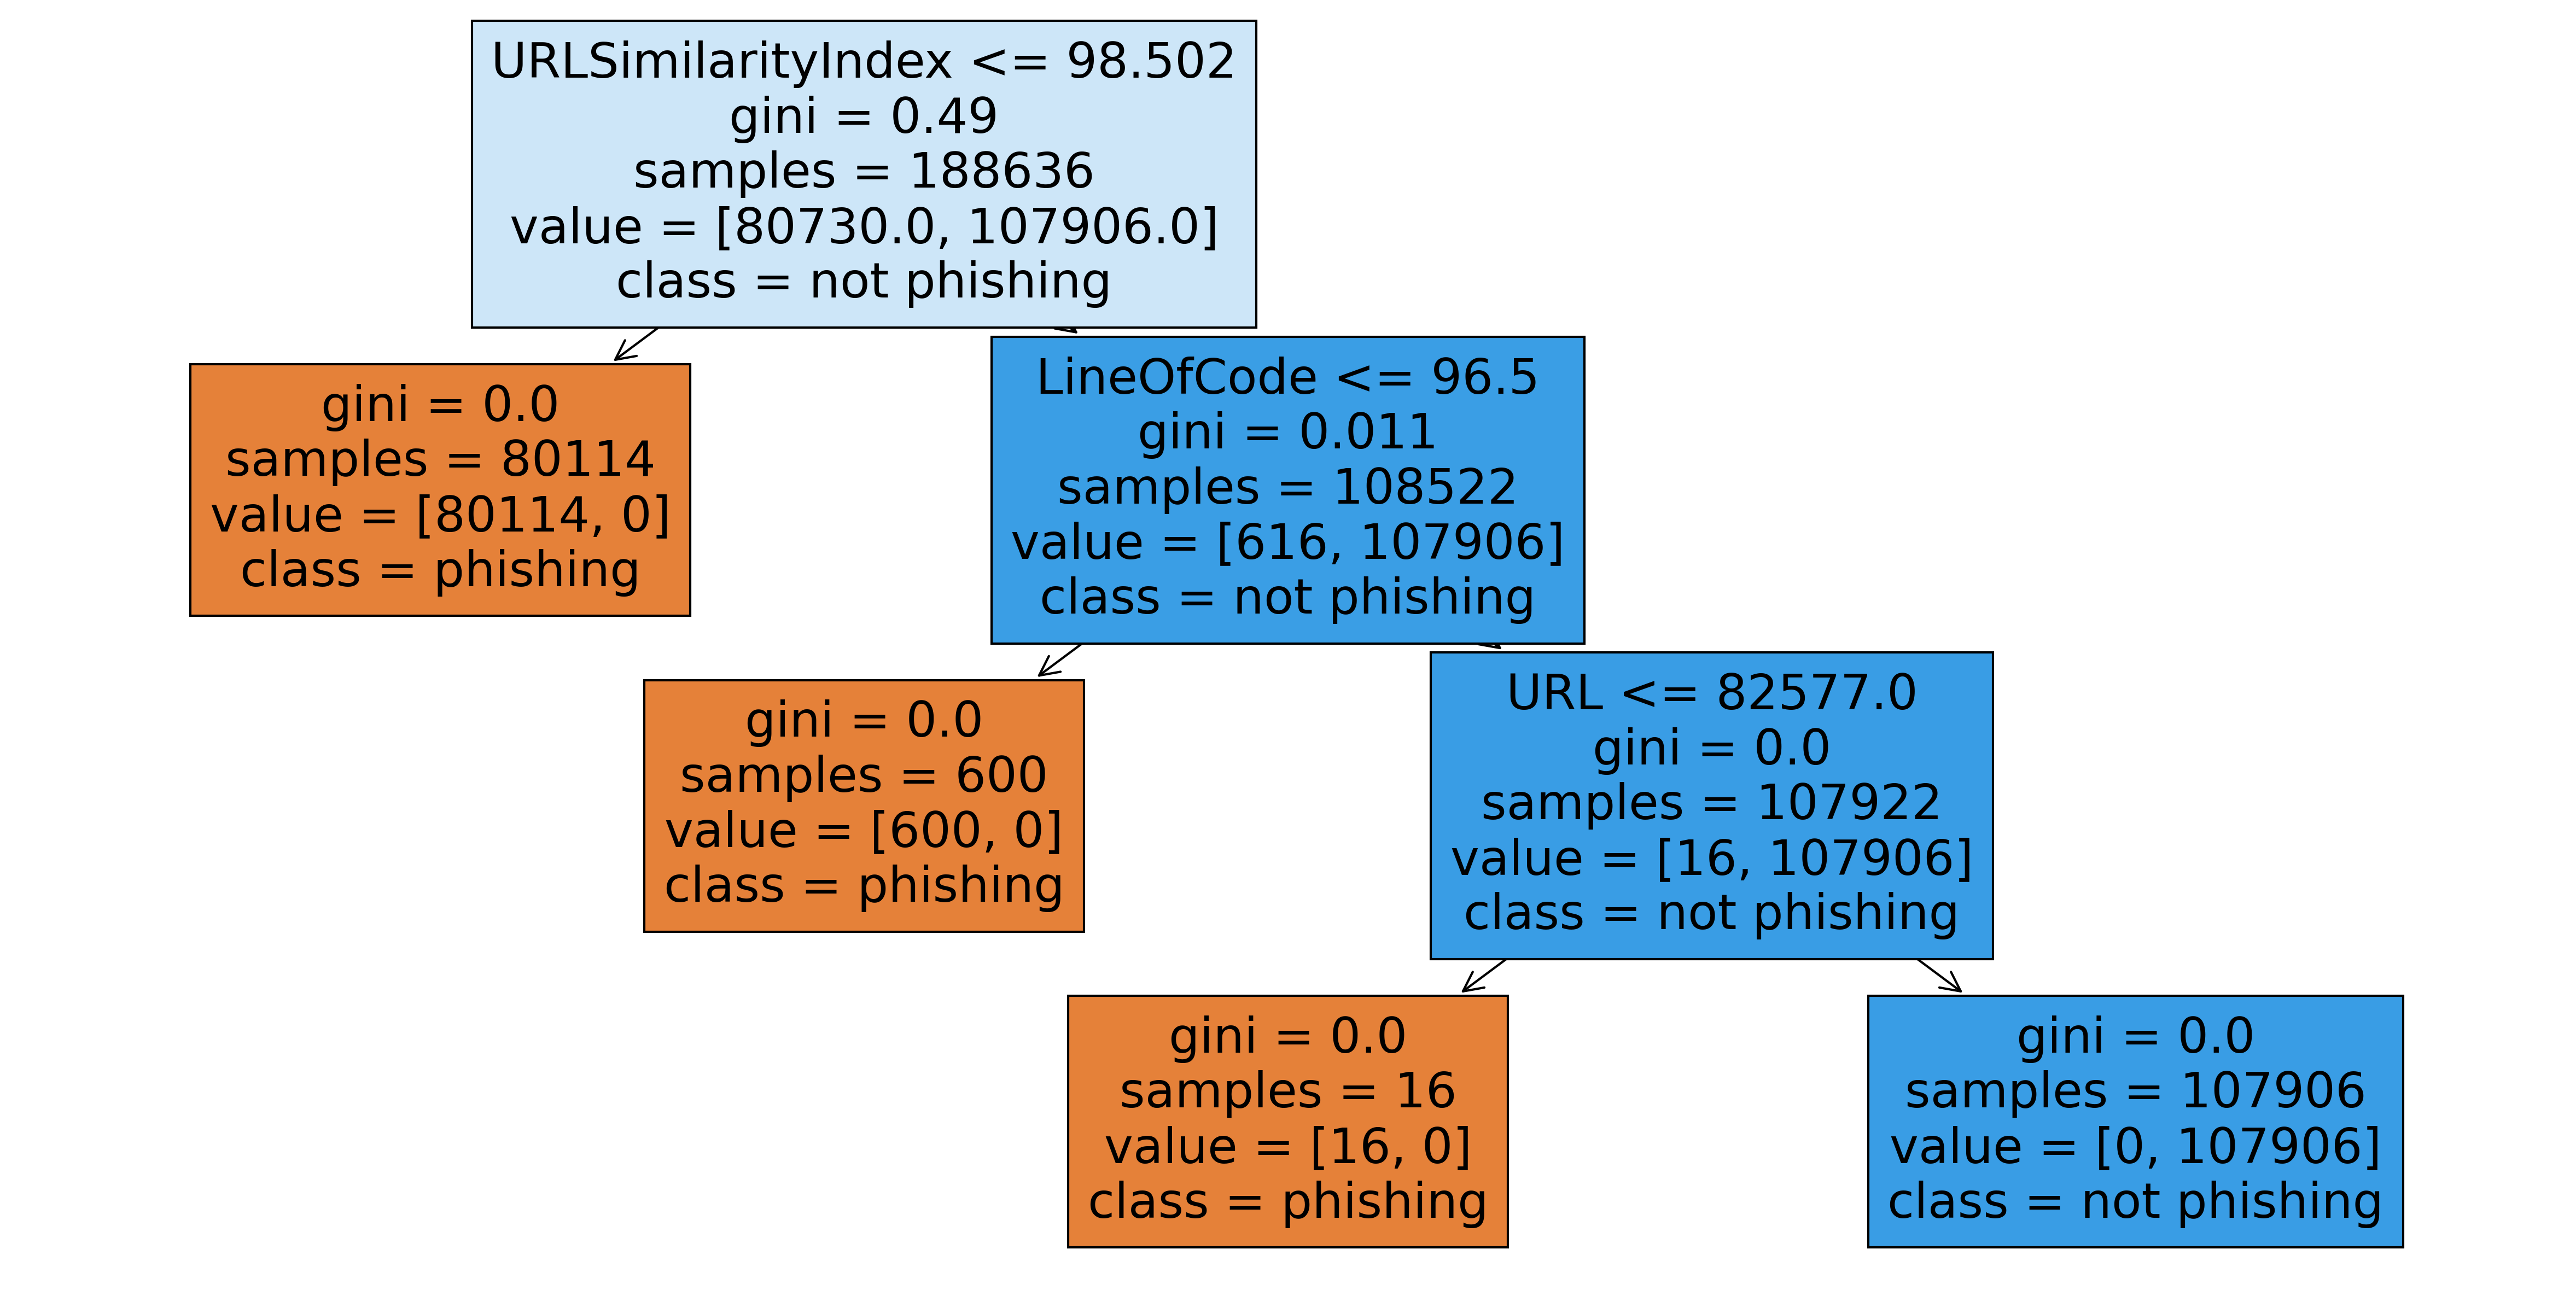

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualization of DTC
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(DTC, feature_names=X_train.columns, class_names=['phishing', 'not phishing'], filled=True)
plt.show()

Nonzero importance feature graph

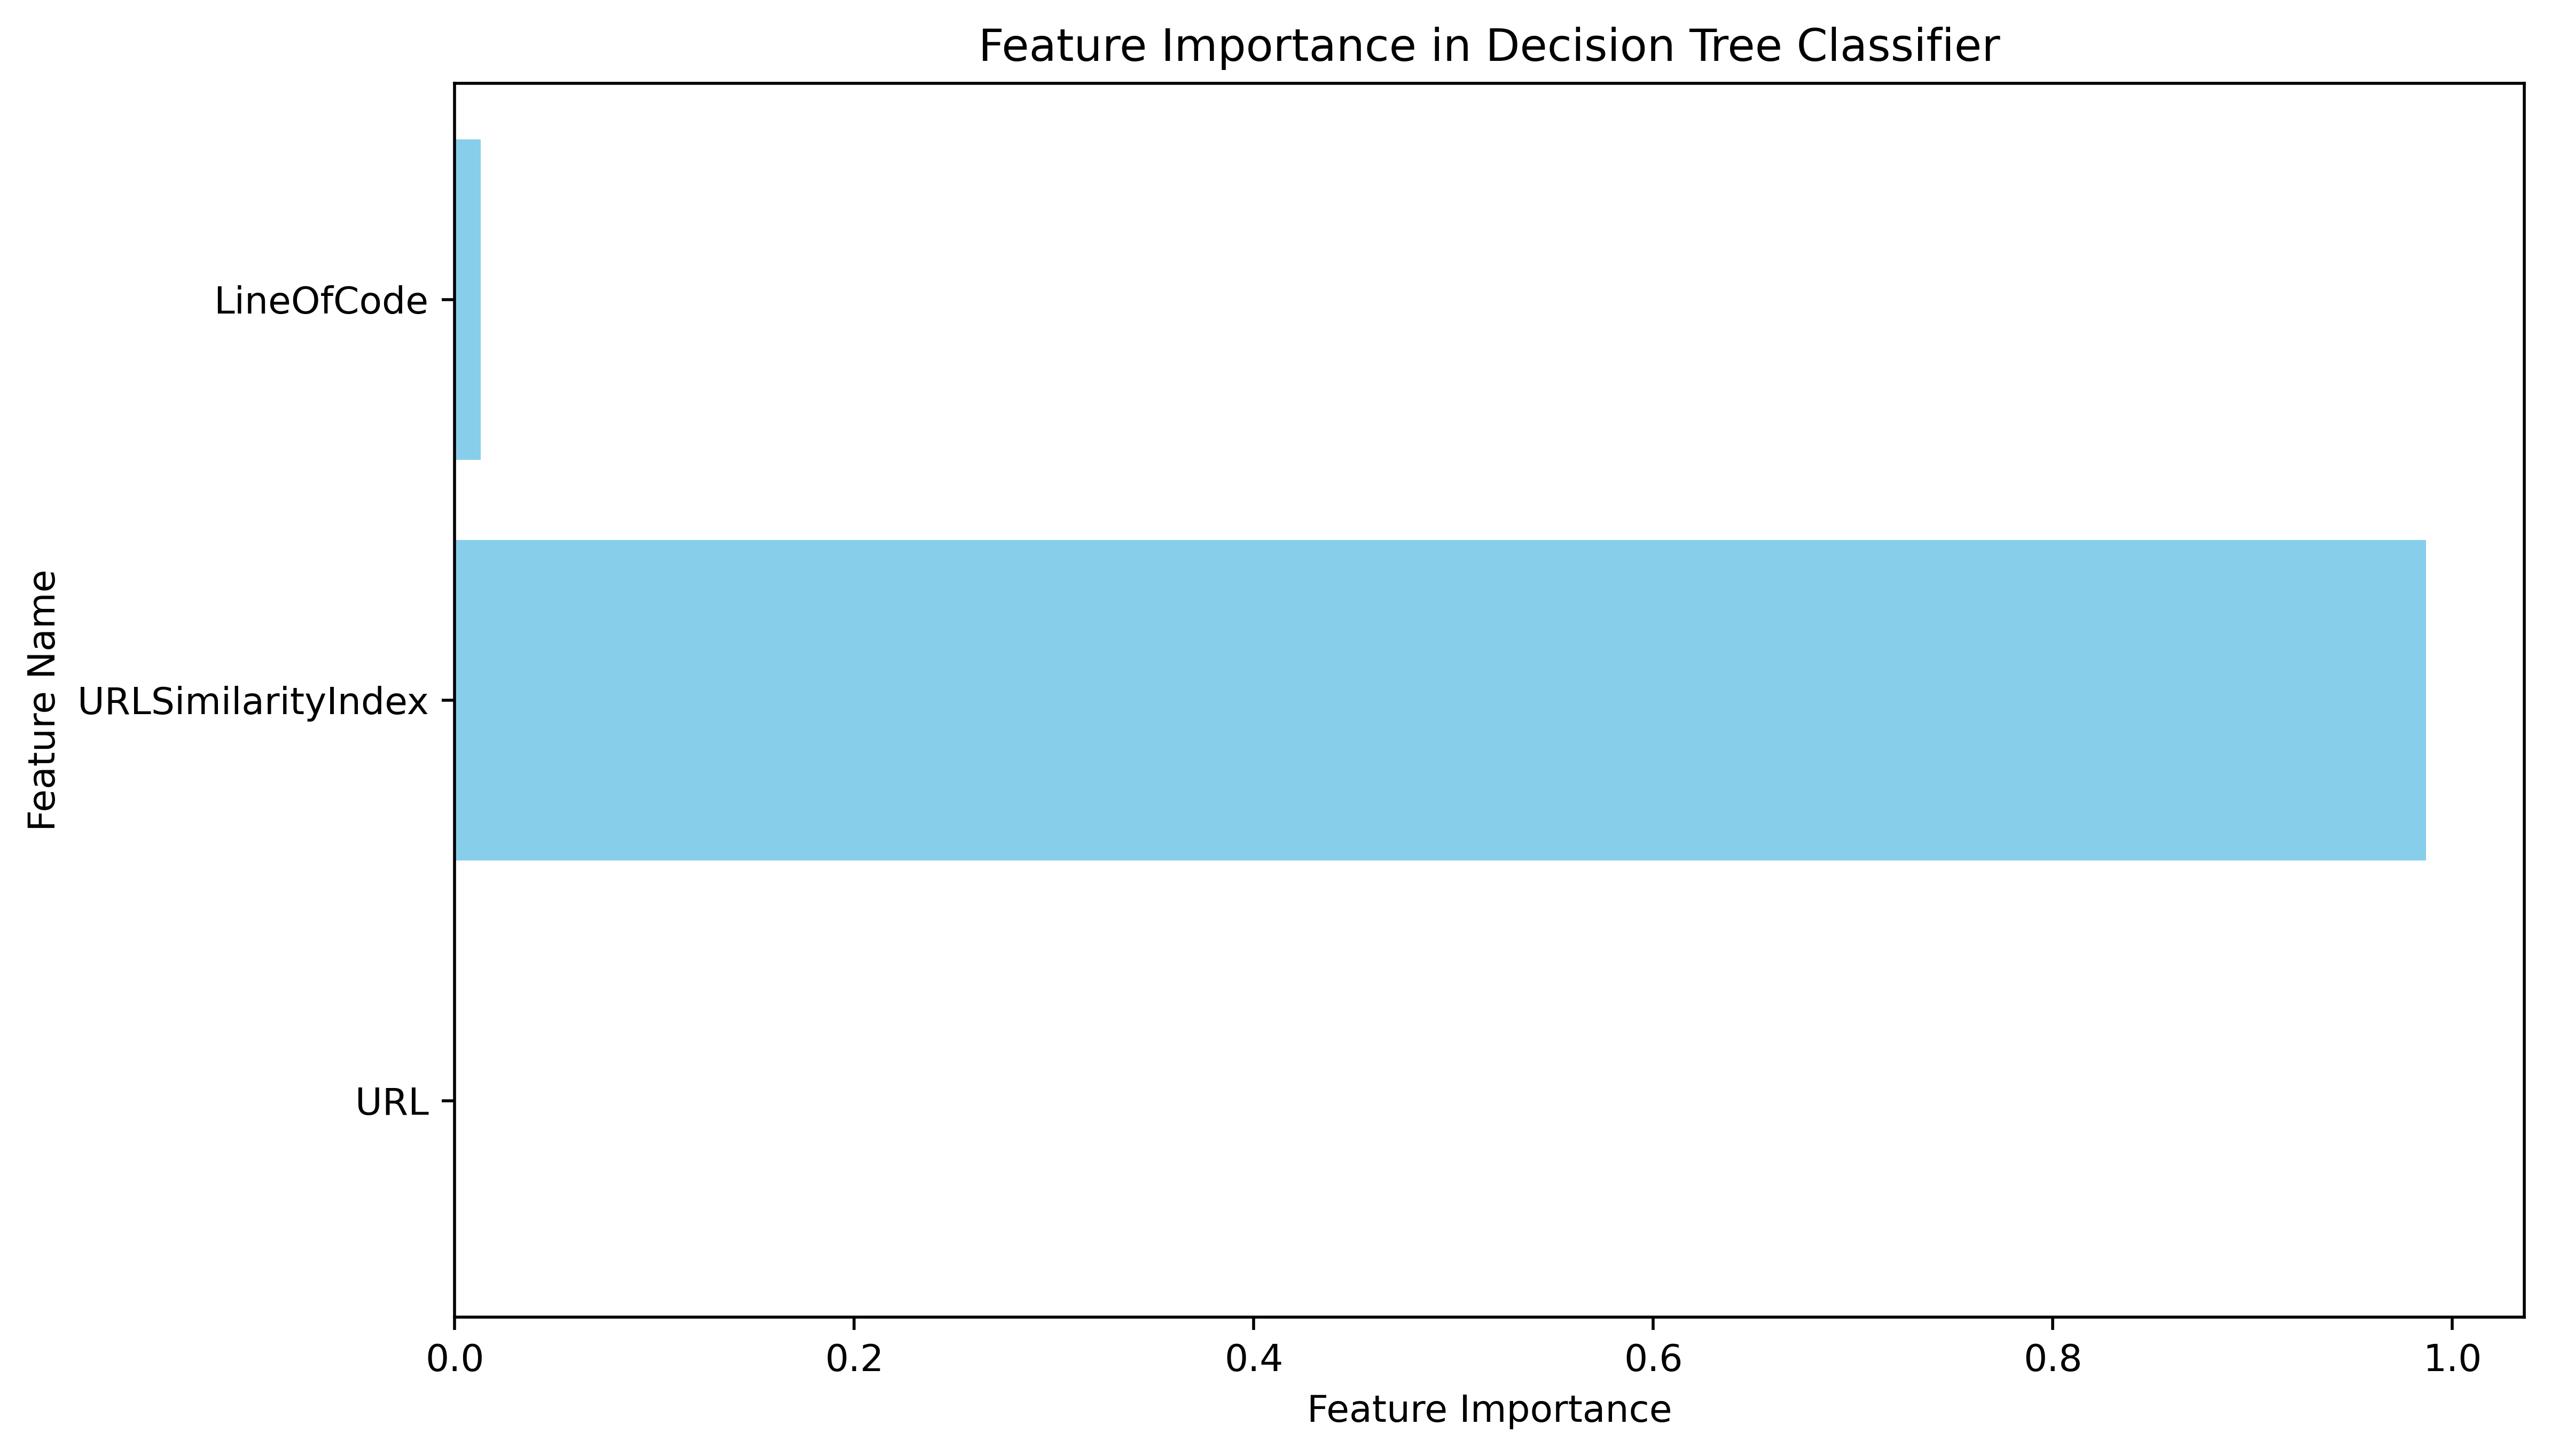

In [5]:
feature_importance = DTC.feature_importances_
feature_names = X_train.columns
nonzero_feature_importance = feature_importance[feature_importance > 0]
nonzero_feature_names = feature_names[feature_importance > 0]

plt.figure(figsize=(10, 6), dpi=500)
plt.barh(nonzero_feature_names, nonzero_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

Model without URLSimiliarityIndex column

accuracy:  0.9994698784961513


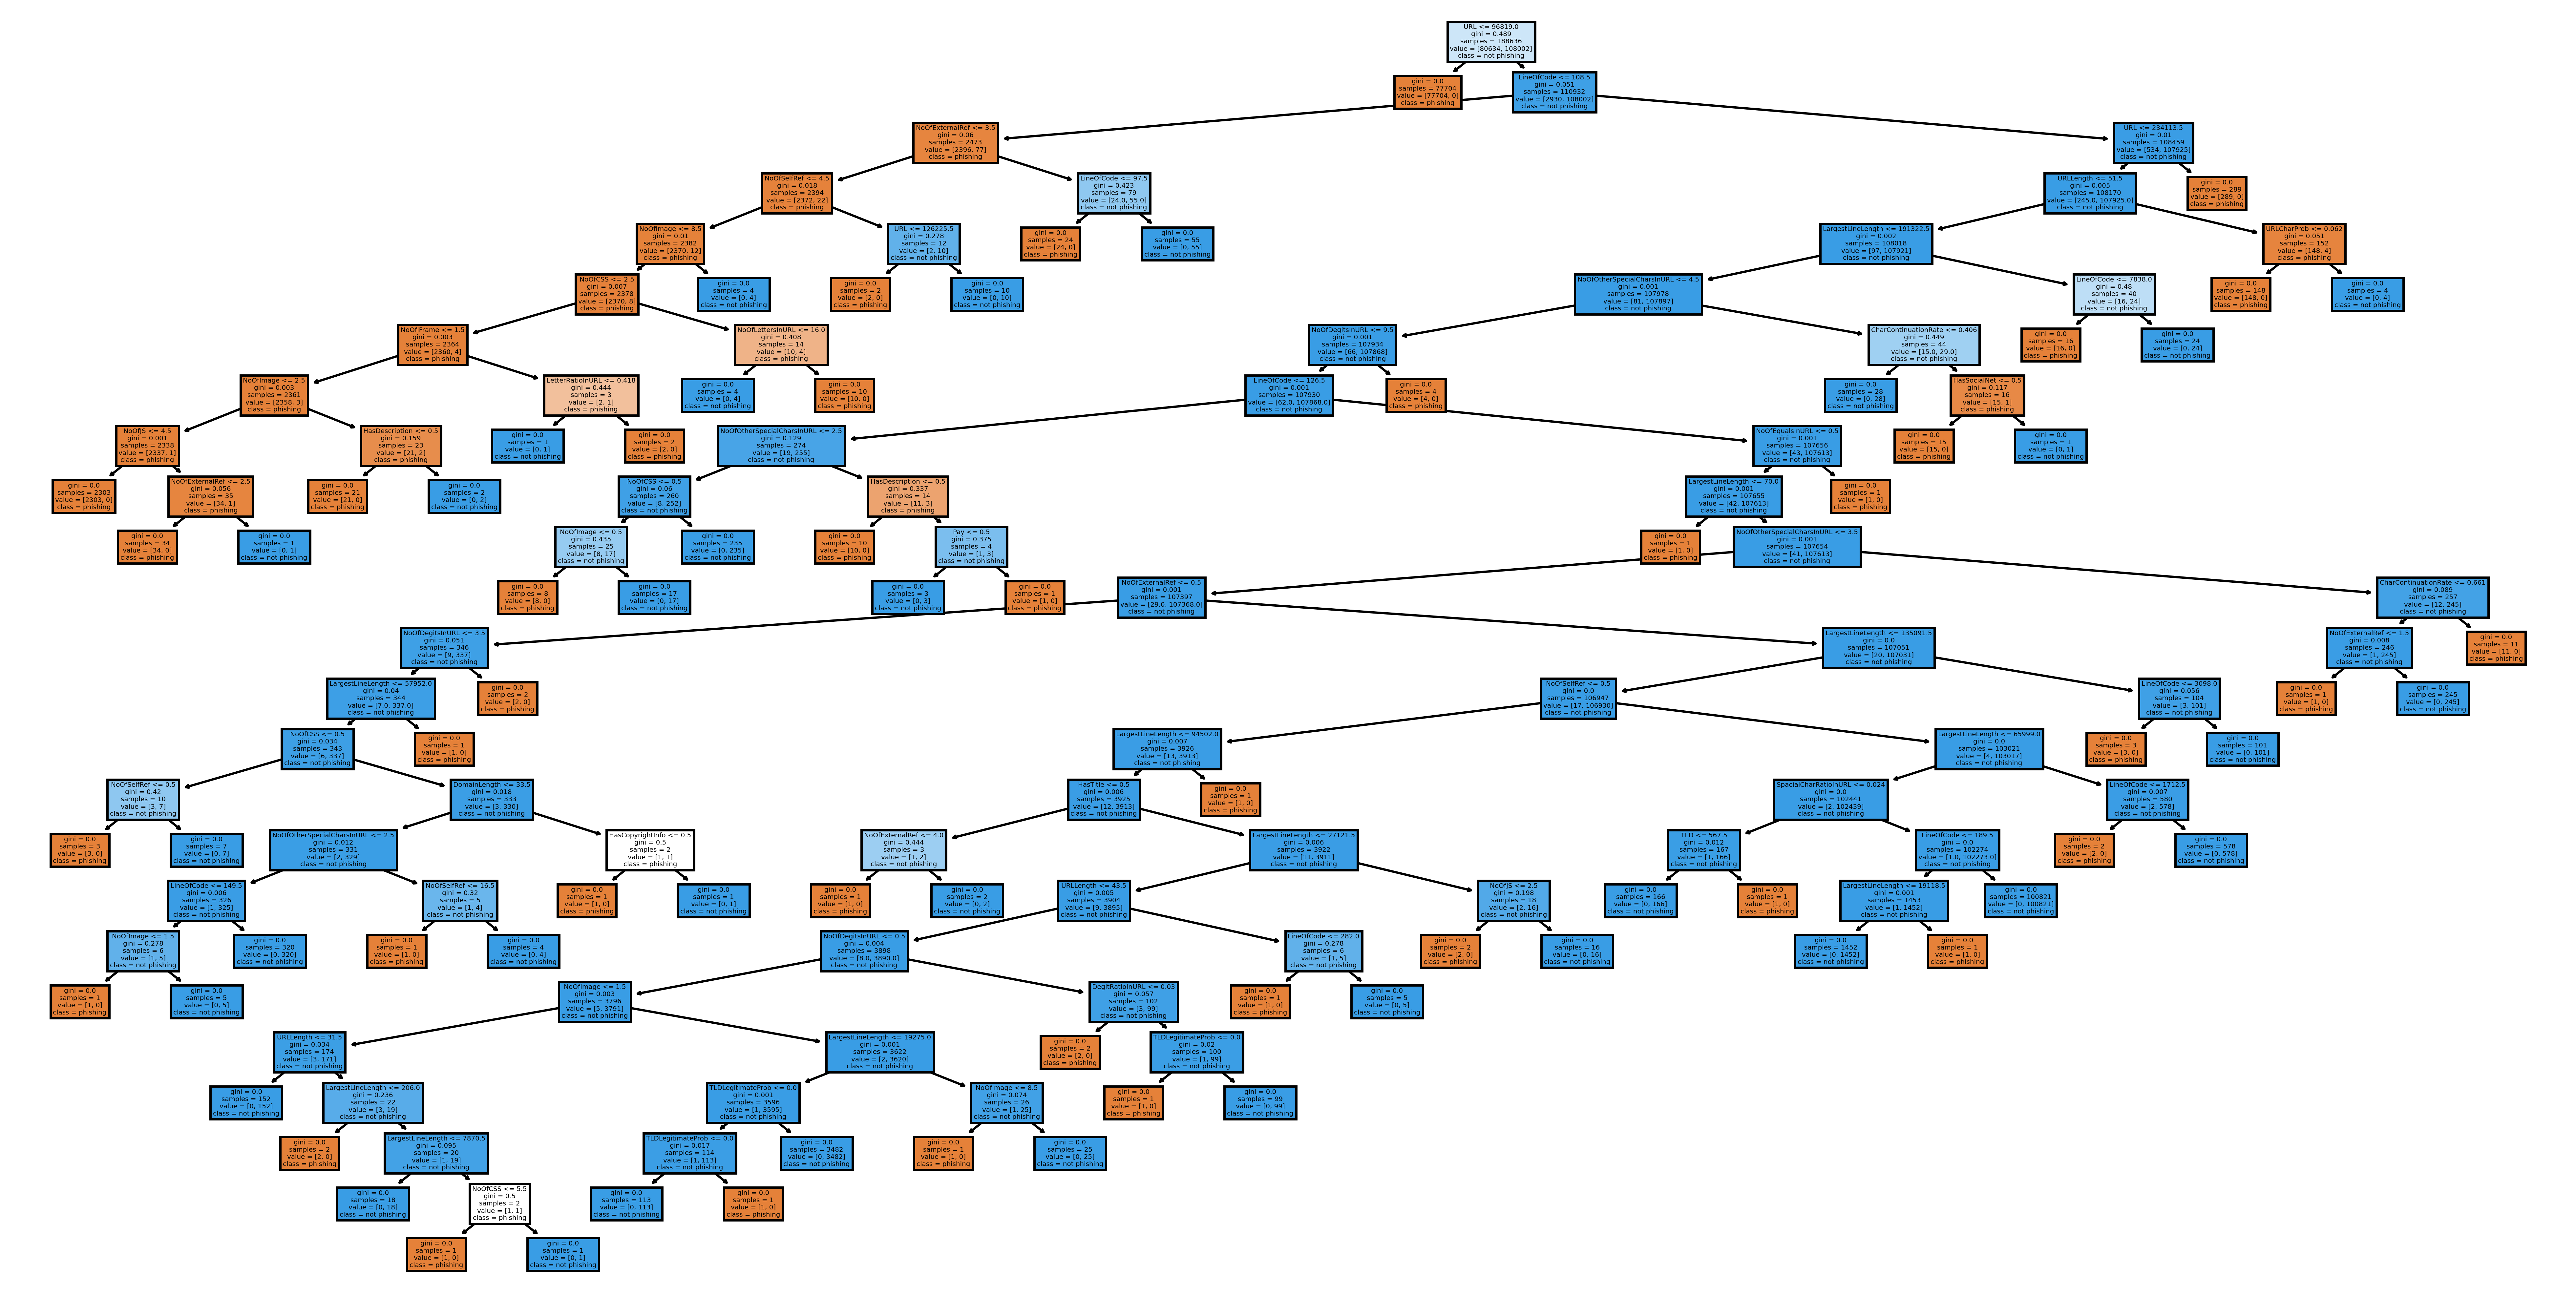

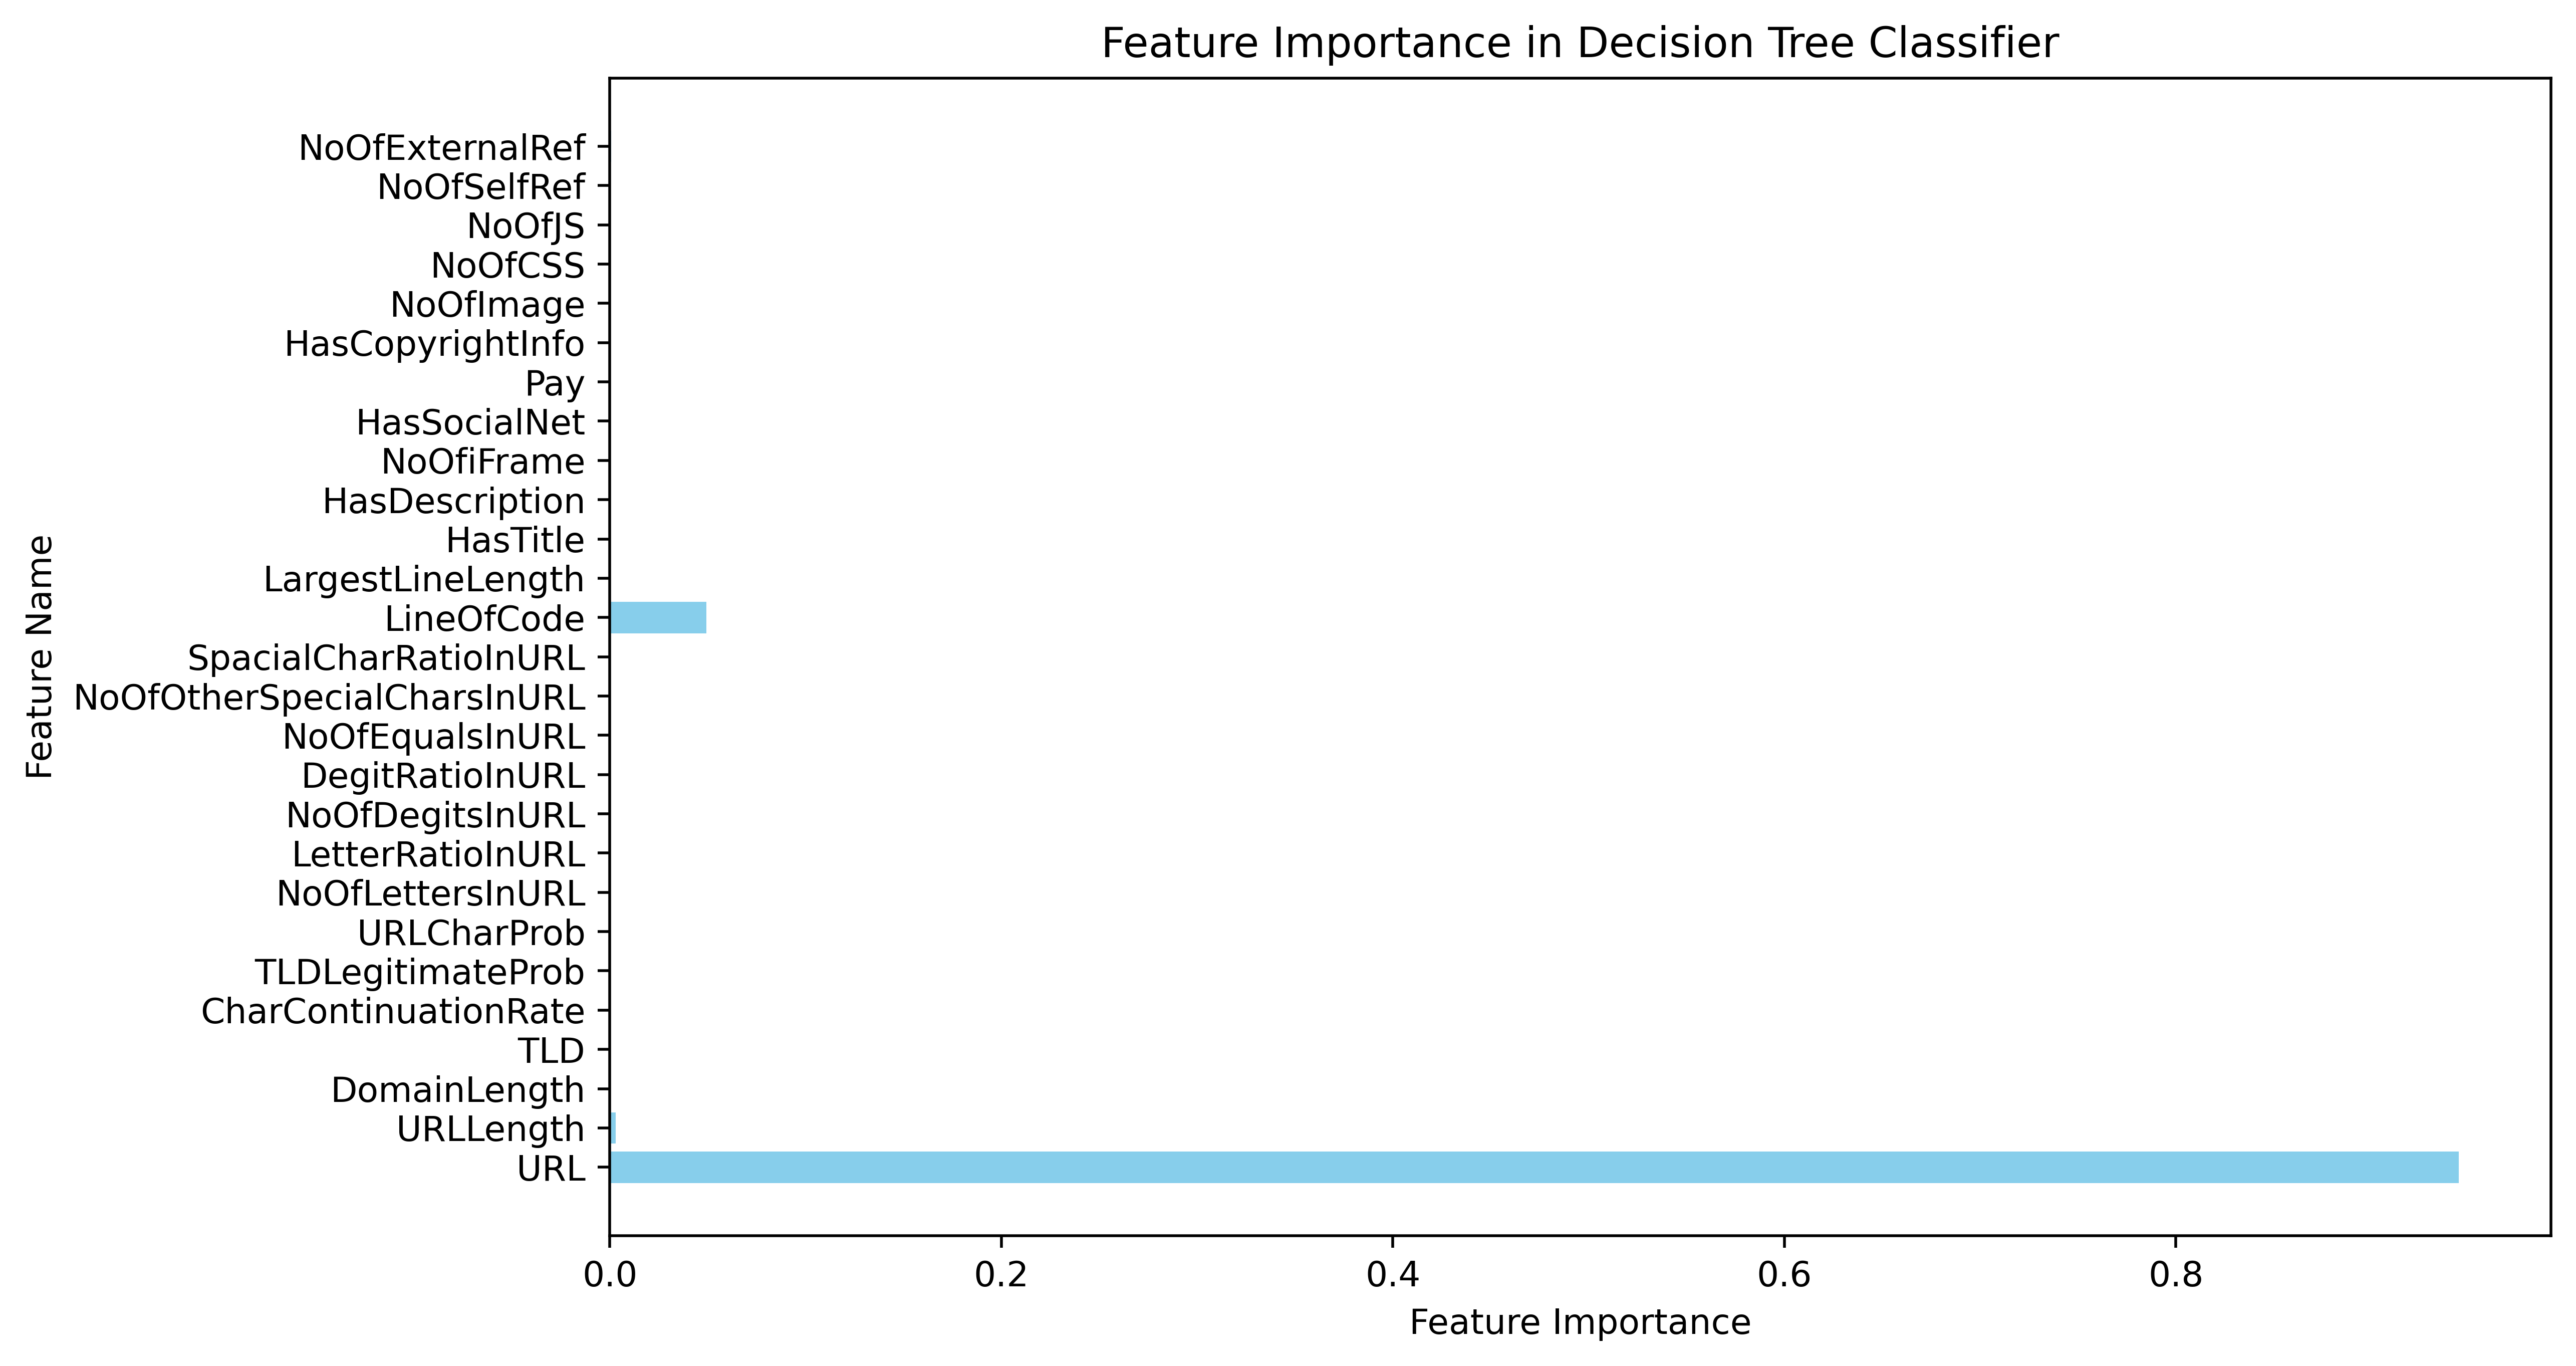

In [6]:
del X["URLSimilarityIndex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()
# Train Decision Tree Classifer
DTC = DTC.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DTC.predict(X_test)
#Model accuracy
print("accuracy: ",metrics.accuracy_score(y_test, y_pred))

# visualization of DTC
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(DTC, feature_names=X_train.columns, class_names=['phishing', 'not phishing'], filled=True)
plt.show()

feature_importance = DTC.feature_importances_
feature_names = X_train.columns
nonzero_feature_importance = feature_importance[feature_importance > 0]
nonzero_feature_names = feature_names[feature_importance > 0]

plt.figure(figsize=(10, 6), dpi=500)
plt.barh(nonzero_feature_names, nonzero_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()